In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


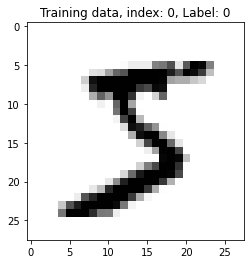

Train the matrix shape (60000, 784)
Test the matrix shape (10000, 784)
(60000,)
(60000, 10)


In [20]:
# Visualize data
%matplotlib inline


def display_digit(index):
  label = y_train[index].argmax(axis=0)
  image = X_train[index].reshape(28, 28)
  plt.title('Training data, index: %d, Label: %d' % (index, label))
  plt.imshow(image, cmap='gray_r')
  plt.show()


display_digit(0)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Train the matrix shape", X_train.shape)
print("Test the matrix shape", X_test.shape)

from keras.utils.np_utils import to_categorical

print(y_train.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)



Next, we must build and define the Neural Network (NN) using Sequential, Dense, and Activation.

Here, 'relu' is just a nonlinear function applied to the above layer (Rectified Linear Unit)

Softmax simply ensures that the output is a valid probability distribution - AKA values obtained are all non negative and sum to one. 

In [21]:
def build_model():
  model = Sequential()
  model.add(Dense(512, input_shape =(784,)))
  model.add(Activation('relu'))

  model.add(Dropout(0.2))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  return model


model = build_model()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Next, we will train the network. We feed it with data. 

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
469/469 [==============================] - 5s 5ms/step - loss: 0.2452 - accuracy: 0.9254 - val_loss: 0.1056 - val_accuracy: 0.9679
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1028 - accuracy: 0.9687 - val_loss: 0.0787 - val_accuracy: 0.9755
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0803 - val_accuracy: 0.9760
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0677 - val_accuracy: 0.9795
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0495 - accuracy: 0.9857 - val_loss: 0.0735 - val_accuracy: 0.9811
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0745 - val_accuracy: 0.9828
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0967 - val_accuracy: 0.9793
Epoch 

In [26]:
score = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)

print('The test score is: ', score[0])
print('The test accuracy is: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9844
The test score is:  0.14302651584148407
The test accuracy is:  0.9843999743461609
